In [76]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [77]:
#Cargamos el dataset
series = read_csv('C:\\Users\\shere\\Downloads\\daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')

In [78]:
#Dividimos en datos de entrenamiento y de pruebas
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [79]:
#Validamos las predicciones con el modelo
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=43.016047, expected=51.000000
predicted=46.506964, expected=41.000000
predicted=45.619679, expected=44.000000
predicted=44.652277, expected=38.000000
predicted=42.058430, expected=68.000000
predicted=49.255859, expected=40.000000
predicted=47.877755, expected=42.000000
predicted=43.871346, expected=51.000000
predicted=47.121732, expected=44.000000
predicted=47.181009, expected=45.000000
predicted=48.670808, expected=36.000000
predicted=42.238475, expected=57.000000
predicted=46.473183, expected=44.000000
predicted=46.752733, expected=42.000000
predicted=44.089722, expected=53.000000
predicted=46.358504, expected=42.000000
predicted=45.809913, expected=34.000000
predicted=44.533052, expected=40.000000
predicted=42.008302, expected=56.000000
predicted=45.542463, expected=44.000000
predicted=45.143492, expected=53.000000
predicted=45.151975, expected=55.000000
predicted=47.509389, expected=39.000000
predicted=47.022304, expected=59.000000
predicted=51.276931, expected=55.000000


In [80]:
#evaluamos nuestras predicciones 
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.598


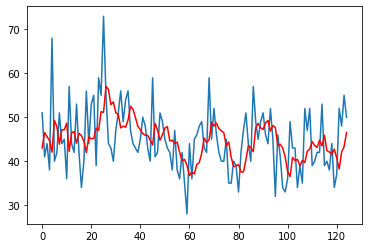

In [81]:
#graficamos predicciones contra valores del dataset
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()